In [1]:
import nltk
from nltk import *
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
import csv
import pickle
import pandas as pd
from sklearn.svm import LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier # A wrapper to include the scikit learn algorithms within the nltk classifier
import matplotlib.pyplot as plt
import random

In [34]:
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools

**Tokenize the data**

In [2]:
def remove_punctuation(word):
    no_punct = ""
    for char in word:
        if char not in string.punctuation:
            no_punct = no_punct + char
    if no_punct.isnumeric():
        return ''
    return no_punct

In [3]:
''.isnumeric()

False

In [4]:
remove_punctuation(".")

''

In [5]:
ps = PorterStemmer()
def stem_the_word(word):
    word.encode('utf-8')
    return ps.stem(word)

In [6]:
stem_the_word("running")

'run'

In [7]:
def tokenize_the_training_data(data):
    tokenized_training_data = []
    for each in data:
        sentiment = each.strip().split(',')[0]
        text = str(each.strip().split(',')[1:])
        tokenized_training_data.append((word_tokenize(text), sentiment))
    return tokenized_training_data

In [8]:
stop_words = stopwords.words('english')
def filter_words(tokenized_data):
    filtered_data = []
    for (tokenized_words, sentiment) in tokenized_data:
        filtered_data.append(([stem_the_word(remove_punctuation(word.lower())) for word in tokenized_words if remove_punctuation(word.lower()) not in stop_words and remove_punctuation(word.lower()) != ''], sentiment))
    return filtered_data

In [9]:
# reading data from reviews.txt
with open("Reviews.txt") as file:
    data = file.readlines()
#print(data)

tokenized_training_data = tokenize_the_training_data(data)
#print(tokenized_training_data)
filtered_training_data = filter_words(tokenized_training_data)
print(filtered_training_data)


[(['nt', 'use', 'facebook', 'messeng', 'often', 'alway', 'reliabl'], '1'), (['phone', 'featur', 'nt', 'work', 'sometim', 'app', 'freez'], '0'), (['kind', 'pest', 'like', 'interrupt', 'someth', 'els'], '0'), (['envas', 'privaci', 'thing', 'comput', 'phone'], '0'), (['want', 'say', 'thank', 'help', 'heather', 'geronimo', 'wonder', 'help'], '1'), (['easi', 'use', 'like', 'notif', 'receiv', 'fb', 'messeng', 'call'], '1'), (['could', 'give', 'zero', 'star', 'forc', 'close', 'u', 'wan', 'na', 'video', 'chat'], '0'), (['great', 'app', 'littl', 'slow', 'come', 'kindl', 'fire'], '0'), (['fb', 'messeng', 'allow', 'avoid', 'work', 'keep', 'contact', 'friend'], '1'), (['like', 'fact', 'messeng', 'app', 'chat', 'fb'], '0'), (['luv', 'much', 'easier', 'text'], '1'), (['love', 'great', 'way', 'stay', 'touch'], '1'), (['fast', 'accur', 'love'], '1'), (['bosch', 'great', 'season', 'compani'], '1'), (['great', 'eaizier', 'talk', 'peopl'], '1'), (['love', 'way', 'give', 'notic'], '1'), (['think', 'improv

In [10]:
def find_words_in_data(filtered_training_data):
    all_words = []
    for (words, sentiment) in filtered_training_data:
        if words != "":
          all_words += words
    return all_words

In [11]:
len(find_words_in_data(filtered_training_data))

39216

In [12]:
def find_word_count(words):
    words = FreqDist(words)
    print(words)
    word_features = [w for (w, c) in words.most_common(1000)]
    return word_features

In [13]:
word_features = find_word_count(find_words_in_data(filtered_training_data))

<FreqDist with 3027 samples and 39216 outcomes>


In [14]:
#word_features_set = set(word_features)
word_features_set = find_words_in_data(filtered_training_data)

In [15]:
len(word_features_set)

39216

In [16]:
def find_features(each_review_words):
    global all_words_in_data
    features = {}
    words = set(each_review_words)
    for each_word in word_features_set:
        #features[each_word] = (each_word in words)
        if each_word in words:
            features[each_word] = 1
        else:
            features[each_word] = 0
    return features

In [17]:
final_filtered_data = [(find_features(words), sentiment) for (words,sentiment) in filtered_training_data]

In [18]:
final_filtered_data[0]

({'nt': 1,
  'use': 1,
  'facebook': 1,
  'messeng': 1,
  'often': 1,
  'alway': 1,
  'reliabl': 1,
  'phone': 0,
  'featur': 0,
  'work': 0,
  'sometim': 0,
  'app': 0,
  'freez': 0,
  'kind': 0,
  'pest': 0,
  'like': 0,
  'interrupt': 0,
  'someth': 0,
  'els': 0,
  'envas': 0,
  'privaci': 0,
  'thing': 0,
  'comput': 0,
  'want': 0,
  'say': 0,
  'thank': 0,
  'help': 0,
  'heather': 0,
  'geronimo': 0,
  'wonder': 0,
  'easi': 0,
  'notif': 0,
  'receiv': 0,
  'fb': 0,
  'call': 0,
  'could': 0,
  'give': 0,
  'zero': 0,
  'star': 0,
  'forc': 0,
  'close': 0,
  'u': 0,
  'wan': 0,
  'na': 0,
  'video': 0,
  'chat': 0,
  'great': 0,
  'littl': 0,
  'slow': 0,
  'come': 0,
  'kindl': 0,
  'fire': 0,
  'allow': 0,
  'avoid': 0,
  'keep': 0,
  'contact': 0,
  'friend': 0,
  'fact': 0,
  'luv': 0,
  'much': 0,
  'easier': 0,
  'text': 0,
  'love': 0,
  'way': 0,
  'stay': 0,
  'touch': 0,
  'fast': 0,
  'accur': 0,
  'bosch': 0,
  'season': 0,
  'compani': 0,
  'eaizier': 0,
  'talk'

In [19]:
len(final_filtered_data)

5313

In [20]:
print(word_features_set)

['nt', 'use', 'facebook', 'messeng', 'often', 'alway', 'reliabl', 'phone', 'featur', 'nt', 'work', 'sometim', 'app', 'freez', 'kind', 'pest', 'like', 'interrupt', 'someth', 'els', 'envas', 'privaci', 'thing', 'comput', 'phone', 'want', 'say', 'thank', 'help', 'heather', 'geronimo', 'wonder', 'help', 'easi', 'use', 'like', 'notif', 'receiv', 'fb', 'messeng', 'call', 'could', 'give', 'zero', 'star', 'forc', 'close', 'u', 'wan', 'na', 'video', 'chat', 'great', 'app', 'littl', 'slow', 'come', 'kindl', 'fire', 'fb', 'messeng', 'allow', 'avoid', 'work', 'keep', 'contact', 'friend', 'like', 'fact', 'messeng', 'app', 'chat', 'fb', 'luv', 'much', 'easier', 'text', 'love', 'great', 'way', 'stay', 'touch', 'fast', 'accur', 'love', 'bosch', 'great', 'season', 'compani', 'great', 'eaizier', 'talk', 'peopl', 'love', 'way', 'give', 'notic', 'think', 'improv', 'best', 'thing', 'sinc', 'grandma', 'sweet', 'tea', 'longer', 'sign', 'face', 'book', 'use', 'kinda', 'annoy', 'time', 'love', 'good', 'app', '

In [21]:
'''def storing_dataset(training_set):
    writer=csv.writer(open("final_dataset.csv",'w'))
    header = list(word_features_set)
    header.append("CLASS_SENTIMENT")   #  1 - for positive   and  0 - for negative
    writer.writerow(header)
    for each_row in training_set:
        listt = []
        dict = each_row[0]
        lable = each_row[1]
        for key in dict:
            listt.append(dict[key])
        listt.append(lable)
        writer.writerow(listt)
        '''

'def storing_dataset(training_set):\n    writer=csv.writer(open("final_dataset.csv",\'w\'))\n    header = list(word_features_set)\n    header.append("CLASS_SENTIMENT")   #  1 - for positive   and  0 - for negative\n    writer.writerow(header)\n    for each_row in training_set:\n        listt = []\n        dict = each_row[0]\n        lable = each_row[1]\n        for key in dict:\n            listt.append(dict[key])\n        listt.append(lable)\n        writer.writerow(listt)\n        '

In [22]:
#storing_dataset(final_filtered_data)

In [23]:
def tokenize_the_test_data(data):
    tokenized_test_data = []
    for each in data:
        sentiment = 'null'
        text = str(each.strip().split(',')[0])
        #print(text)
        tokenized_test_data.append((word_tokenize(text), sentiment))
    #print(tokenized_test_data)
    return tokenized_test_data
def predict(data, model):
    result = []
    tokenized_test_data = tokenize_the_test_data(data)
    #print(tokenized_training_data)
    filtered_test_data = filter_words(tokenized_test_data)
    #print(filtered_test_data)
    filtered_test_data = [(find_features(words), sentiment) for (words,sentiment) in filtered_test_data]
    #print(filtered_test_data)
    #print(len(filtered_test_data))
    for each in filtered_test_data:
        #print(each[0])
        result.append(model.classify(each[0]))
    return result
    
    
    

### Splitting the final filtered data into training and test Split

In [25]:
random.shuffle(final_filtered_data)
train_set = final_filtered_data[:3500]
test_set = final_filtered_data[3501:]

# Fitting a LinearSVC Classifier

In [26]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(train_set)

<SklearnClassifier(LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))>

In [27]:
print("LinearSVC_Classifier accuracy percent: ", (nltk.classify.accuracy(LinearSVC_classifier, test_set))*100)

LinearSVC_Classifier accuracy percent:  81.78807947019867


In [28]:
y_pred = []
y_actual = []
for each_set in test_set:
    y_actual.append(each_set[1])
    y_pred.append(LinearSVC_classifier.classify(each_set[0]))
print(y_pred)
print(y_actual)

['0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1',

[[ 372  199]
 [ 131 1110]]


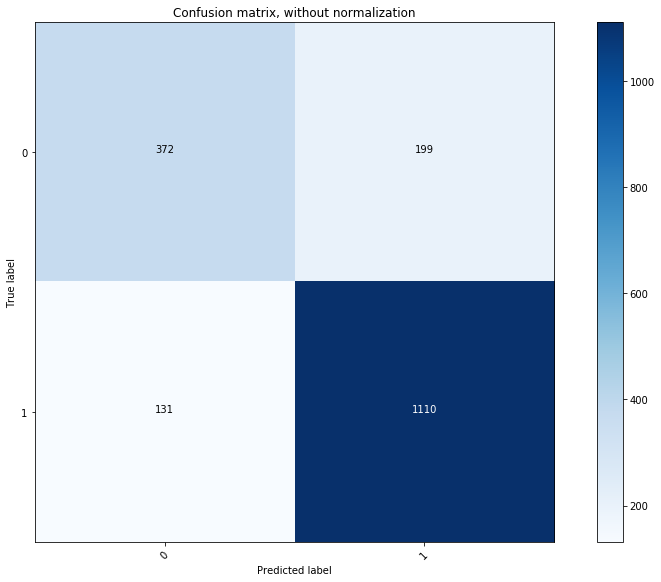

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_actual, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 8))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.savefig('./Output/Confusion_matrix.png')
plt.show()

## Predicting Sentiment for Tweets on LGBT

In [37]:
india_df = pd.read_csv('./TwitterTweets/test.csv')
india_df.head()

,created_at,text
0,2018-05-08 19:32:35,RT @unwomenasia: You have the right to define ...
1,2018-05-08 19:31:56,I’m still looking for LGBT movie/short film wh...
2,2018-05-08 19:25:35,RT @avimHarZ: Just finished this! Jane and Tal...
3,2018-05-08 19:23:24,RT @avimHarZ: Just finished this! Jane and Tal...
4,2018-05-08 19:21:41,RT @cuntmina: this is the loudest thing she's ...


In [38]:
rs = predict(list(india_df.text) , LinearSVC_classifier)
rs

['1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1'

In [39]:
india_df['Sentiment'] = rs

In [40]:
n_tweets = len(india_df[india_df.Sentiment == '0'])

In [41]:
p_tweets = len(india_df[india_df.Sentiment == '1'])

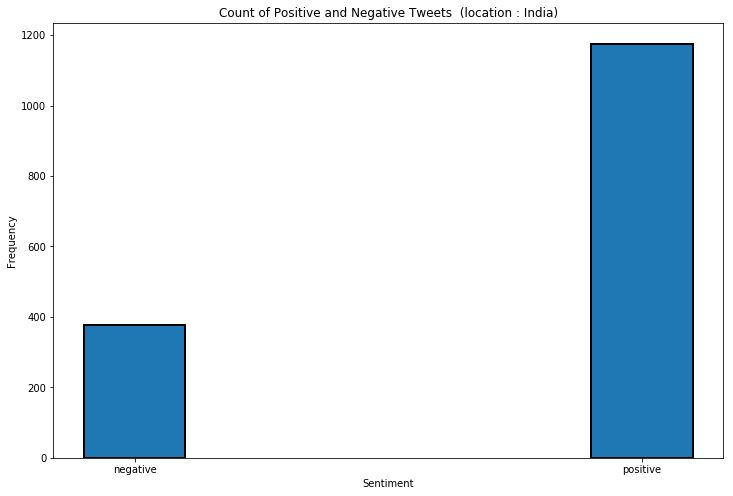

In [103]:
plt.figure(figsize=(12, 8))
plt.bar(['negative', 'positive'], [n_tweets, p_tweets] , width=0.2, align = 'center' , ec=['k','k'] , linewidth = 2)
plt.title('Count of Positive and Negative Tweets  (location : India)')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.savefig('./Output/India_LGBT_sentiment.png')
plt.show()

### Similarly For the world Data

In [44]:
world_df = pd.read_csv('./TwitterTweets/world.csv')
world_df.head()

,created_at,text
0,Tue May 08 20:24:54 +0000 2018,RT @cuddlyvmin: trust jimin to always be there...
1,Tue May 08 20:24:54 +0000 2018,@Shinnerz37 @Saucy_Sarcasm @Angel_Wings93 @ser...
2,Tue May 08 20:24:54 +0000 2018,RT @NoXBOX_OvaHere: @PlayOverwatch @BCRFcure Y...
3,Tue May 08 20:24:54 +0000 2018,Show your support for Ireland in Semi Final 1 ...
4,Tue May 08 20:24:54 +0000 2018,RT @Gain1DDrive: Follow everyone that likes th...


In [46]:
w_rs = predict(list(world_df.text) , LinearSVC_classifier)
w_rs

['1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0'

In [47]:
world_df['Sentiment'] = w_rs

In [56]:
world_df.head()

,created_at,text,Sentiment
0,Tue May 08 20:24:54 +0000 2018,RT @cuddlyvmin: trust jimin to always be there...,1
1,Tue May 08 20:24:54 +0000 2018,@Shinnerz37 @Saucy_Sarcasm @Angel_Wings93 @ser...,1
2,Tue May 08 20:24:54 +0000 2018,RT @NoXBOX_OvaHere: @PlayOverwatch @BCRFcure Y...,0
3,Tue May 08 20:24:54 +0000 2018,Show your support for Ireland in Semi Final 1 ...,1
4,Tue May 08 20:24:54 +0000 2018,RT @Gain1DDrive: Follow everyone that likes th...,1


In [57]:
neg_tweets = len(world_df[world_df.Sentiment == '0'])

In [74]:
pos_tweets = len(world_df[world_df.Sentiment == '1'])

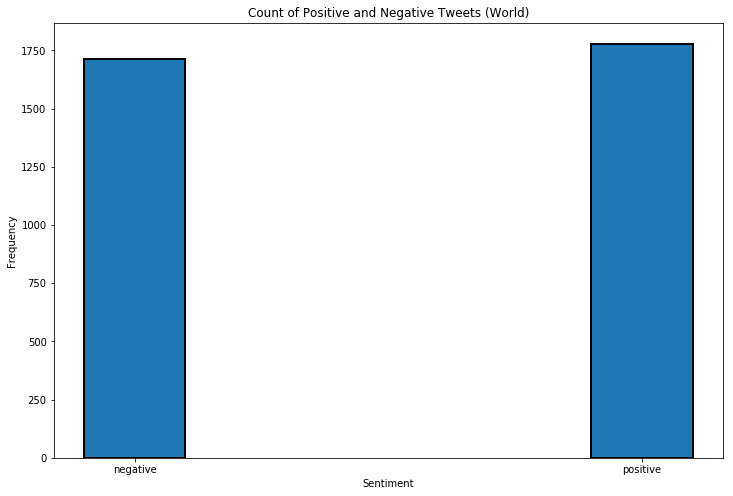

In [102]:
plt.figure(figsize=(12, 8))
plt.bar(['negative', 'positive'], [neg_tweets, pos_tweets] , width=0.2, align = 'center' , ec=['k','k'] , linewidth = 2)
plt.title('Count of Positive and Negative Tweets (World)')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.savefig('./Output/World_LGBT_sentiment.png')
plt.show()

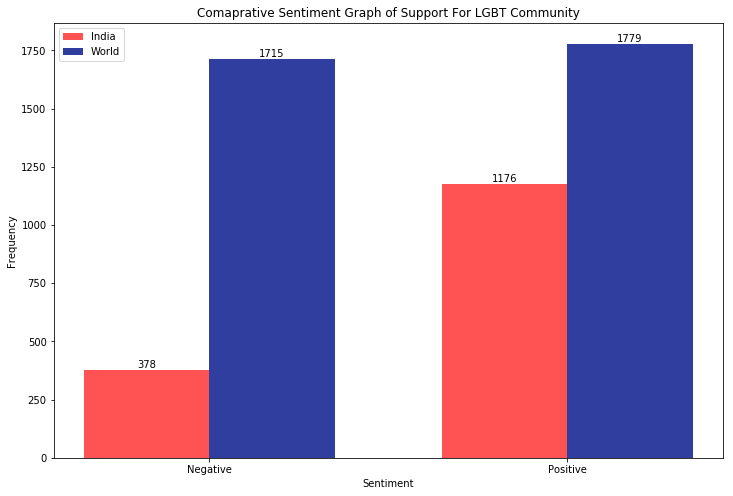

In [104]:
ind = np.arange(2)  # the x locations for the groups
width = 0.35       # the width of the bars
india  = (n_tweets, p_tweets)
plt.figure(figsize = (12, 8))
fig, ax = plt.subplots(figsize = (12, 8))
rects1 = ax.bar(ind, india, width, color='#FF5252')

world = (neg_tweets, pos_tweets)
rects2 = ax.bar(ind + width, world, width, color='#303F9F', linewidth=6)
ax.set_ylabel('Frequency')
ax.set_title('Comaprative Sentiment Graph of Support For LGBT Community')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Negative', 'Positive'))
ax.set_xlabel('Sentiment')

ax.legend((rects1[0], rects2[0]), ('India', 'World'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.savefig('./Output/Comaparative_LGBT_sentiment.png')
plt.show()